### Logistic Regression Model building in TensorFlow

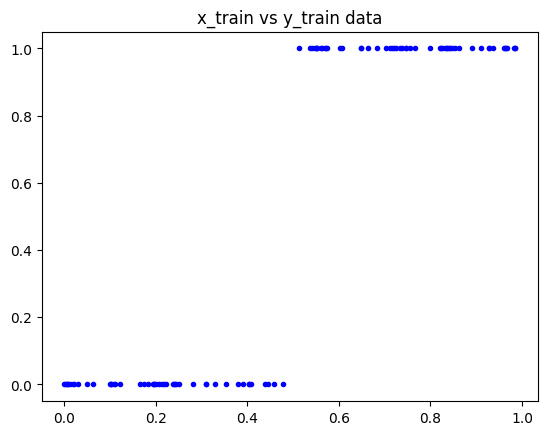

In [19]:
# This step is for data creation
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)
import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

epoch: 1, loss: 23.72132110595703, W: [0.70883495], b: [0.01453851], a: [0.70663863]
epoch: 2, loss: 21.80652618408203, W: [1.069826], b: [-0.12961233], a: [1.0657859]
epoch: 3, loss: 18.74152946472168, W: [1.3873405], b: [-0.61171734], a: [1.4431338]
epoch: 4, loss: 13.981670379638672, W: [1.9662199], b: [-0.6231279], a: [2.0044699]
epoch: 5, loss: 10.018231391906738, W: [1.8696045], b: [-1.7986913], a: [2.2751446]
epoch: 6, loss: 26.365949630737305, W: [4.2617474], b: [1.3076541], a: [1.785068]
epoch: 7, loss: 44.103763580322266, W: [4.216538], b: [0.83372426], a: [1.3299553]
epoch: 8, loss: 36.985591888427734, W: [4.0750794], b: [-0.19120383], a: [0.23896122]
epoch: 9, loss: 19.67298126220703, W: [4.150337], b: [-0.30095237], a: [1.6101669]
epoch: 10, loss: 22.949831008911133, W: [3.814596], b: [-2.053312], a: [1.0722955]
epoch: 11, loss: 8.485740661621094, W: [4.193862], b: [-1.7096602], a: [1.7634499]
epoch: 12, loss: 4.841836929321289, W: [4.1024566], b: [-2.1712303], a: [1.99355

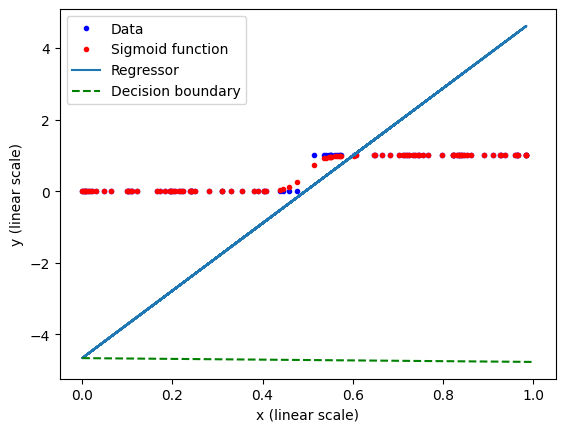

In [20]:
# Model y = sigmoid(X*W + b)
def output(x, a, W, b): 
    return tf.sigmoid(a * (W * x + b))

# Linear function
def linear_function(x, W, b):
    return (W * x + b)

# Loss function: sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

# Initialize weights and biases
W = tf.Variable(tf.random.uniform(shape=(1,)))
b = tf.Variable(tf.zeros(shape=(1,)))
a = tf.Variable(tf.random.uniform(shape=(1,)))

# Optimization
learning_rate = 0.1
steps = 300 # epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train, a, W, b)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db, dloss_a = tape.gradient(loss, [W, b, a])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    a.assign_sub(learning_rate * dloss_a)
    print(f"epoch: {i+1}, loss: {loss.numpy()}, W: {W.numpy()}, b: {b.numpy()}, a: {a.numpy()}")

# Calculate the perpendicular (decision boundary)
x_decision = np.linspace(0, 1, 100)
y_decision = - (1/W.numpy()) * x_decision + (b.numpy())

# Plotting
plt.plot(x_train, y_train, 'b.', label='Data')
plt.plot(x_train, output(x_train, a, W, b), 'r.', label='Sigmoid function')
plt.plot(x_train, linear_function(x_train, W, b), label='Regressor')
plt.plot(x_decision, y_decision, 'g--', label='Decision boundary')
plt.xlabel("x (linear scale)")
plt.ylabel("y (linear scale)")
# plt.xlim(-0.1,1.1)
# plt.ylim(-0.1,1.1)
plt.legend()
plt.show()


epoch: 1, loss: 24.91570472717285, W: [0.32100803], b: [0.01849798], a: [0.46316478]
epoch: 2, loss: 24.068923950195312, W: [0.59352225], b: [-0.0100085], a: [0.6508992]
epoch: 3, loss: 22.778274536132812, W: [0.90554184], b: [-0.1481736], a: [0.9375387]
epoch: 4, loss: 20.503217697143555, W: [1.219833], b: [-0.5021157], a: [1.2970424]
epoch: 5, loss: 16.526180267333984, W: [1.6572325], b: [-0.7721895], a: [1.8129566]
epoch: 6, loss: 11.337728500366211, W: [2.01133], b: [-1.0967335], a: [2.274871]
epoch: 7, loss: 7.811246395111084, W: [2.5704222], b: [-0.7687324], a: [2.6110613]
epoch: 8, loss: 12.15677547454834, W: [1.8394526], b: [-3.1459084], a: [2.591342]
epoch: 9, loss: 49.63066482543945, W: [2.13089], b: [-2.8005924], a: [2.3790011]
epoch: 10, loss: 44.05453872680664, W: [3.3219745], b: [-1.3764099], a: [1.7692978]
epoch: 11, loss: 7.335503578186035, W: [3.1279511], b: [-2.2138605], a: [2.0564933]
epoch: 12, loss: 10.79957103729248, W: [4.382839], b: [-0.49389338], a: [2.1136103]

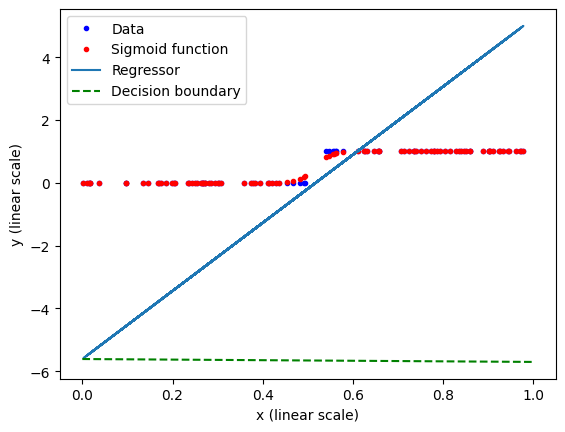

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate some dummy data
x_train = np.random.rand(100, 1)
y_train = np.where(x_train < 0.5, 0, 1)

# Model y = sigmoid(X*W + b)
def output(x, a, W, b): 
    return tf.sigmoid(a * (W * x + b))

# Linear function
def linear_function(x, W, b):
    return (W * x + b)

# Loss function: sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

# Initialize weights and biases
W = tf.Variable(tf.random.uniform(shape=(1,)))
b = tf.Variable(tf.zeros(shape=(1,)))
a = tf.Variable(tf.random.uniform(shape=(1,)))

# Optimization
learning_rate = 0.1
steps = 300 # epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train, a, W, b)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db, dloss_a = tape.gradient(loss, [W, b, a])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    a.assign_sub(learning_rate * dloss_a)
    print(f"epoch: {i+1}, loss: {loss.numpy()}, W: {W.numpy()}, b: {b.numpy()}, a: {a.numpy()}")

# Calculate the perpendicular (decision boundary)
x_decision = np.linspace(0, 1, 100)
y_decision = - (1/W.numpy()) * x_decision + (b.numpy())

# Plotting
plt.plot(x_train, y_train, 'b.', label='Data')
plt.plot(x_train, output(x_train, a, W, b), 'r.', label='Sigmoid function')
plt.plot(x_train, linear_function(x_train, W, b), label='Regressor')
plt.plot(x_decision, y_decision, 'g--', label='Decision boundary')
plt.xlabel("x (linear scale)")
plt.ylabel("y (linear scale)")
plt.legend()
plt.show()
